# Lets add city/country propogation to the simple SIR model

## model :

Lets model a situation with two countries like France and Italy for exemple, that share a border.

$0$ for France and $1$ for italy

let $I_i(t)$ be the proportion of infected persons,

$S_i(t)$ the proportion of healthy person, 

and $R_i(t)$ the proportion of recovered person

for $i \in \{1,2\}$

The cross countires SIR model is :

$S_i'(t) = -S(t)*[U_{ii}*I_i(t)+ U_{ij}*I_j(t)] $ <br/>
$I_i'(t) = S(t)*[U_{ii}*I_i(t)+ U_{ij}*I_j(t)] - 1/\lambda * I(t) $ <br/>
$R_i'(t) = 1/\lambda * I(t) $

for $i \in \{1,2\}$

note that the differential system has a **null divergence**U_{12} on under some conditions (in our 2-countries exemple, the conditons is that U is a symetric matrix i.e $U_{12}=U_{21}$ <br/>

however within a given population lets say France, the divergence is not nesceserly null, the idea is that the term $U_{ij}*I_j(t)$ represent the flux of people from France to Italy


**Note** :

* The diagonal element of $U$ are $ \beta $ it is the infectious of the virus
* The other elements are lineary links to the flux between coutries  

Let $Y_2(t) \in R^3$ the following vector :
$$Y_2(t) = (S_2(t),I_2(t),R_2(t))^\top$$
and 
$$Y_2(0) = (1 -\epsilon,\epsilon,0)^\top$$

where $  \frac{1}{N_{individus}} \le \epsilon \le 1 $

and 
$$Y_1(0) = (1,0,0)^\top$$

i.e : there are no infected people yet in France and at least one case in Italy

## Lets code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import os
os.chdir(os.path.expanduser(".."))
from src.packages.models.SIR_models import base_sri_model

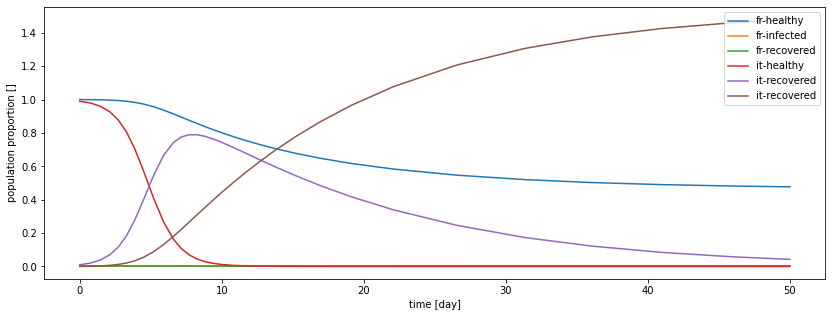

In [6]:
class cross_SIR(base_sri_model):
    labels=["fr-healthy","fr-infected","fr-recovered","it-healthy","it-recovered","it-recovered"]
    
    epsilon=1e-2
    beta = 0.5
    
    flux_cross_both_contries=0.05 # mean that both exchange 1%of their population
    
    U = np.eye(2)
    U[0,1]=flux_cross_both_contries
    U[1,0]=flux_cross_both_contries
    t_max=50
    y0_it = np.array([1-epsilon,epsilon,0])
    y0_fr = np.array([1,0,0])
    a = 10
    y0=np.append(y0_fr,y0_it)

    def edp_model(self,t,y):
        U = self.U
        infected_within_fr= y[0]*U[0,0]*y[1]
        infected_fr_to_it =  y[0]*U[0,1]*y[4]
        
        recovered_fr = 1/self.a * y[1] 
        
        infected_within_it = y[3]*U[1,1]*y[4]
        infected_it_to_fr = y[3]*U[1,0]*y[1]
        
        recovered_it = 1/self.a * y[4]
    
    
        dydt = np.array([-infected_within_fr - infected_fr_to_it,
                         infected_within_fr + infected_it_to_fr -recovered_fr,
                         recovered_fr,
                         -infected_within_it - infected_it_to_fr,
                         infected_within_it + infected_fr_to_it- recovered_it,
                         recovered_it])
                                 
        return dydt
       
e = cross_SIR()
e.simulate()